# Test for transient CSEM using emg3d calculations in the Laplace domain

### Conclusion

**Unfortunately, Laplace-to-time transformation using digital linear filters (DLF) seems only to work with very precise data in the Laplace domain over the whole range of required $s$-values.**

In [1]:
import empymod
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Style adjustments
%matplotlib notebook
plt.style.use('ggplot')
plt.rcParams['savefig.dpi'] = 300

### Model and transform parameters

In [4]:
x = 900
y = 0
## y = 900
z = 0
src = [0, 0, z]
rec = [x, y, z]
res = 1
depth = []
time = np.logspace(-2, 1, 151)

kind = 'lap'
pts_per_dec = -1

In [5]:
# Load Laplace-to-time domain filter.
filt = empymod.filters.DigitalFilter('lap_201_empy3', filter_coeff=['lap'])
filt.fromfile(path='/home/dtr/Codes/empymod-Laplace-transform/filters')

# Get required s-values
sval, _ = empymod.transform.get_spline_values(filt, time, pts_per_dec)
sval = -np.squeeze(sval)

## Laplace-domain calculation

In [6]:
# Analytical in x-s domain
epm_a = empymod.dipole(src, rec, depth, res, sval, xdirect=True, verb=2)

# Copy numerical example, add an error value
epm_e = epm_a.copy()
ind = 100
print(f"sval with error: {-sval[ind]:.2e} Hz")
fact = 1+1e-5
## fact = 1+1e-8*(np.random.random(epm_e.shape)-0.5)
if pts_per_dec == 0:
    epm_e[:, ind] *= fact
else:
    epm_e[ind] *= fact


:: empymod END; runtime = 0:00:00.002522 :: 

sval with error: 2.73e-02 Hz


### Carry-out Laplace transform, calculate analytical result

In [7]:
# Carry out DLF {np.dot(req_la, filt.lap)/times}
epm_tn = empymod.transform.dlf(epm_a, -sval, time, filt, pts_per_dec, kind=kind)
epm_te = empymod.transform.dlf(epm_e, -sval, time, filt, pts_per_dec, kind=kind)

# Analytical result
epm_ta = empymod.dipole(src, rec, depth, res, time, signal=0, verb=1)

### Plot time-domain result

<IPython.core.display.Javascript object>


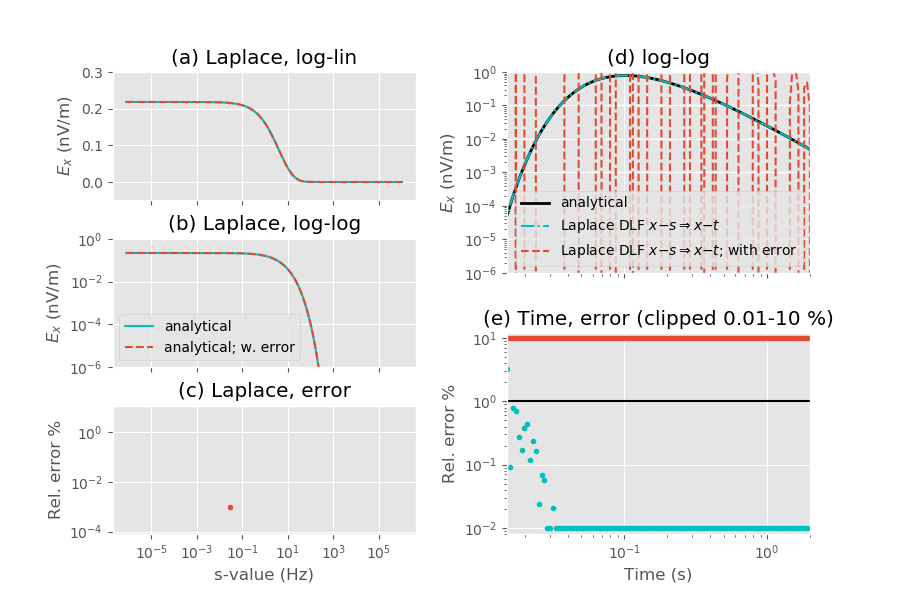

In [14]:
fig = plt.figure(figsize=(9, 6))
plt.subplots_adjust(wspace=.3, hspace=.3)

ax1 = plt.subplot(321)
plt.title('(a) Laplace, log-lin')
plt.plot(abs(sval), 1e9*epm_a, 'c-')
plt.plot(abs(sval), 1e9*epm_e, 'C0--')
plt.ylabel('$E_x$ (nV/m)')
plt.xscale('log')
plt.ylim([-0.05, 0.3])
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = plt.subplot(323, sharex=ax1)
plt.title('(b) Laplace, log-log')
plt.plot(abs(sval), 1e9*epm_a, 'c-', label=r'analytical')
plt.plot(abs(sval), 1e9*epm_e, 'C0--', label=r'analytical; w. error')
plt.ylabel('$E_x$ (nV/m)')
plt.xscale('log')
plt.legend()
plt.ylim([1e-6, 1e0])
plt.yscale('log')
plt.setp(ax2.get_xticklabels(), visible=False)

ax3 = plt.subplot(325, sharex=ax1)
#plt.title('clipped 0.01-10')
plt.title('(c) Laplace, error')

err_int =  100*abs((epm_e-epm_a)/epm_a)

plt.ylabel('Rel. error %')
plt.plot(abs(sval), err_int, 'C0.')
#plt.hlines(1, 1e-100, 1e100)

plt.xscale('log')
plt.yscale('log')
plt.ylim([0.00008, 12])
plt.xlabel('s-value (Hz)')
plt.yticks([1, 0.01, 0.0001])



ax4 = plt.subplot(222)
plt.title('(d) log-log')
plt.plot(time, epm_ta*1e9, 'k', lw=2, label=r'analytical')
plt.plot(time, epm_tn*1e9, 'c-.',
         label=r'Laplace DLF $x\mathrm{-}s \Rightarrow x\mathrm{-}t$')
plt.plot(time, epm_te*1e9, 'C0--',
         label=r'Laplace DLF $x\mathrm{-}s \Rightarrow x\mathrm{-}t$; with error')
ax4.legend()

plt.ylabel('$E_x$ (nV/m)')
plt.xlim([1.5e-2, 2e0])
plt.ylim([1e-6, 1e0])
plt.xscale('log')
plt.yscale('log')
plt.setp(ax4.get_xticklabels(), visible=False)

ax5 = plt.subplot(224, sharex=ax4)
plt.title('(e) Time, error (clipped 0.01-10 %)')

err2 = np.clip(100*abs((epm_tn-epm_ta)/epm_ta), 0.01, 10)
err = np.clip(100*abs((epm_te-epm_ta)/epm_ta), 0.01, 10)

plt.loglog(time, err2, 'c.')
plt.loglog(time, err, 'C0.')
plt.hlines(1, 0, 100)
plt.xlabel('Time (s)')
plt.ylabel('Rel. error %')
plt.ylim([0.008, 12])

plt.savefig('../figures/s-t_time.pdf', bbox_inches='tight')
plt.show()

In [8]:
empymod.Report()

--------------------------------------------------------------------------------
  Date: Fri Sep 06 13:20:47 2019 CEST

             Linux : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
            7.7 GB : RAM
           Jupyter : Environment

  Python 3.7.3 (default, Mar 27 2019, 22:11:17)  [GCC 7.3.0]

            1.16.4 : numpy
             1.2.1 : scipy
         1.8.4dev0 : empymod
             2.6.9 : numexpr
             7.5.0 : IPython
             3.1.1 : matplotlib

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------